<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Seyed Mohammad Ojagh kazazi

**Student ID**: 400100554



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [2]:
## Import necessary libraries here ##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [3]:
## Write your code here ##
df = pd.read_csv('Q1/boston.csv')
df.info()
print("**************")
print(df.shape)
print("**************")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
**************
(506, 14)
**************


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<span style="color:pink;">As you can see, the **Boston.csv** file is a dataset with `506` rows and `14` columns. The first `5` rows and names of all columns are shown at the second table above.</span>

<span style="color:pink;">Also, types of data in each columns are shown at the first table above.</span>

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [4]:
# Step 1: Split the dataset into features (X) and target (y)
X = df.drop('MEDV', axis=1) 
y = df['MEDV']
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5: Calculate and report the R^2 and RMSE for both the training and testing data
print("Train R^2: ", r2_score(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test R^2: ", r2_score(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Step 6: Report the coefficients of the model
print("Coefficients: ", model.coef_)

Train R^2:  0.7508856358979672
Train RMSE:  4.6520331848801675
Test R^2:  0.6687594935356339
Test RMSE:  4.928602182665323
Coefficients:  [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:
$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

In [5]:
## Write your code here ##
alphas = 10**np.linspace(3, -3, 100) * 0.5

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

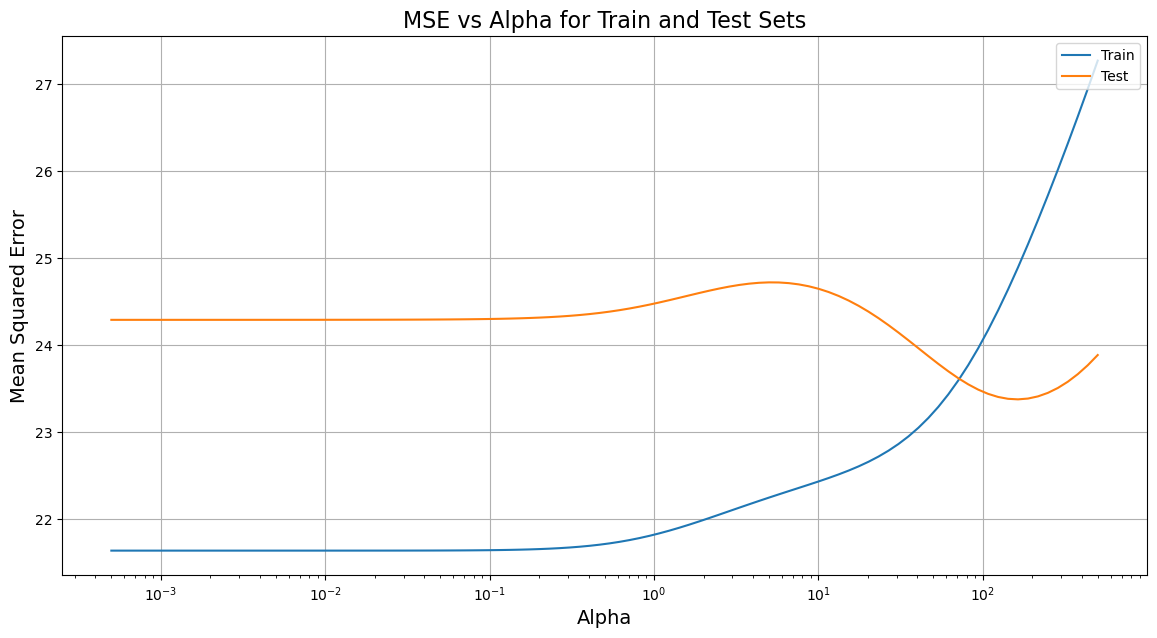

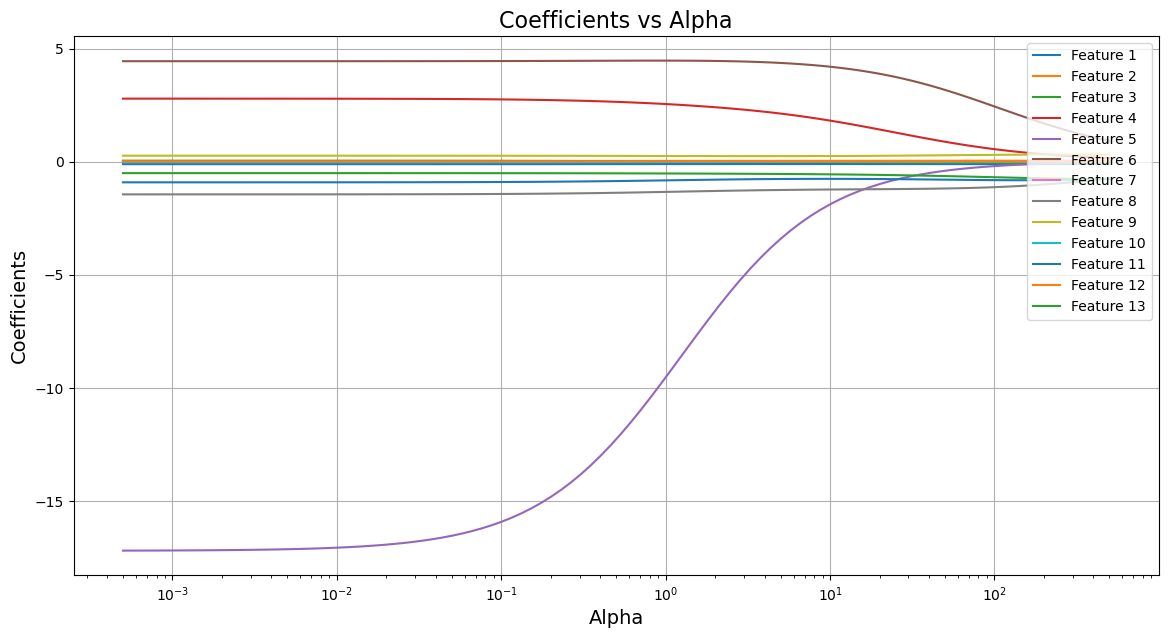

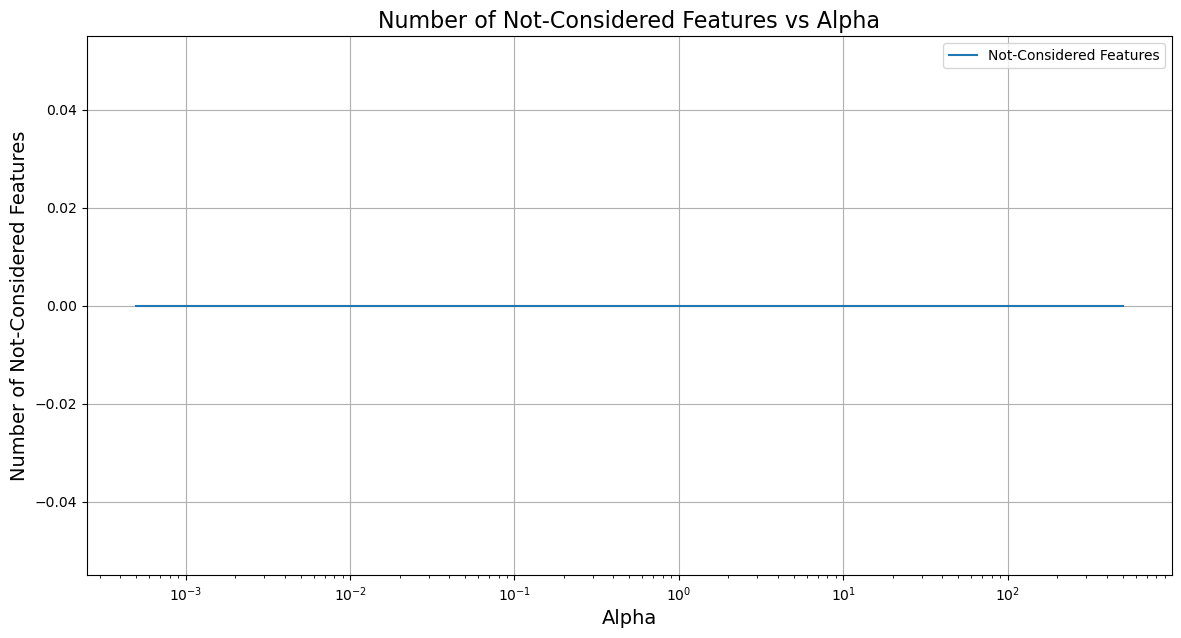

Optimum alpha:  163.72745814388642
Train MSE:  24.893440476055073
Test MSE:  23.37816817150738
Train R^2:  0.7134515354789042
Test R^2:  0.6812087531281752
Coefficients:  [-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]


In [6]:
# Initialize lists to store metrics and coefficients
train_errors = []
test_errors = []
coefficients = []
zero_features = []

# For each alpha
for alpha in alphas:
    # Create and train a Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    # Calculate MSE
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # Store coefficients and count zero coefficients (not considered features)
    coefficients.append(ridge.coef_)
    zero_features.append(np.sum(ridge.coef_ == 0))



# Convert coefficients to a numpy array for easier manipulation
coefficients = np.array(coefficients)


# Plot MSE for train and test versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('MSE vs Alpha for Train and Test Sets', fontsize=16)
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot coefficients versus alpha
plt.figure(figsize=(14, 7))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label = 'Feature ' + str(i+1))
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Coefficients', fontsize=14)
plt.title('Coefficients vs Alpha', fontsize=16)
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot number of not-considered features versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_features, label='Not-Considered Features')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Number of Not-Considered Features', fontsize=14)
plt.title('Number of Not-Considered Features vs Alpha', fontsize=16)
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



# Find the alpha that minimizes the test error
optimum_alpha = alphas[np.argmin(test_errors)]

print("Optimum alpha: ", optimum_alpha)


# Create and train a Ridge regression model with the optimum alpha
ridge_opt = Ridge(alpha=optimum_alpha)
ridge_opt.fit(X_train, y_train)

# Make predictions
y_train_pred_opt = ridge_opt.predict(X_train)
y_test_pred_opt = ridge_opt.predict(X_test)

# Calculate and print MSE for train and test sets
print("Train MSE: ", mean_squared_error(y_train, y_train_pred_opt))
print("Test MSE: ", mean_squared_error(y_test, y_test_pred_opt))

# Calculate and print R^2 for train and test sets
print("Train R^2: ", r2_score(y_train, y_train_pred_opt))
print("Test R^2: ", r2_score(y_test, y_test_pred_opt))

# Print coefficients
print("Coefficients: ", ridge_opt.coef_)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

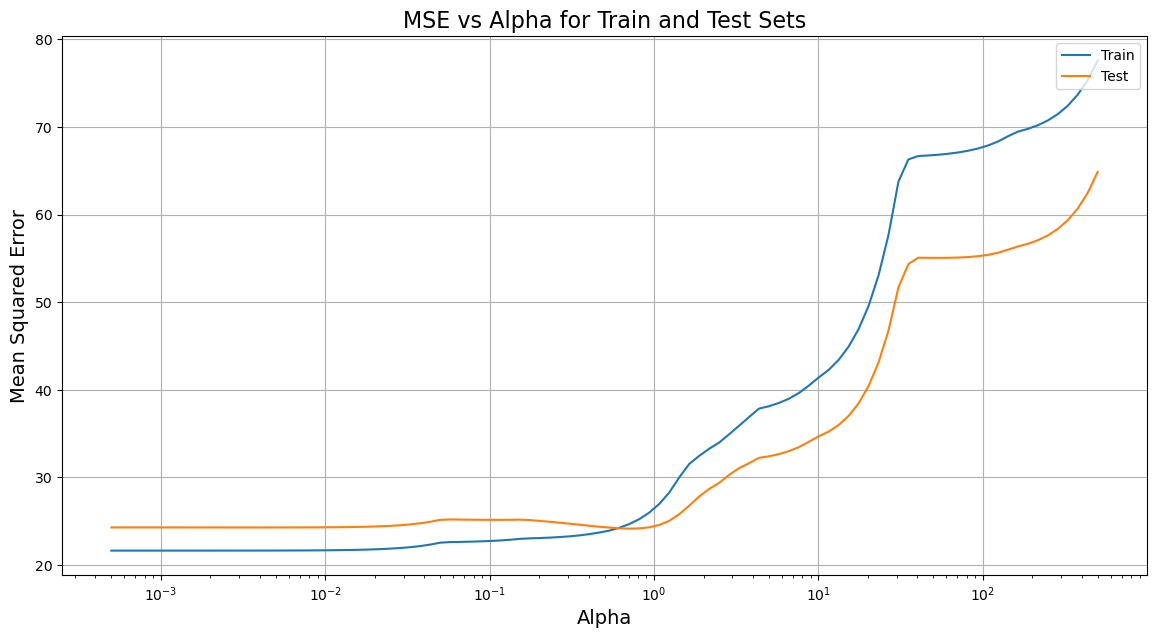

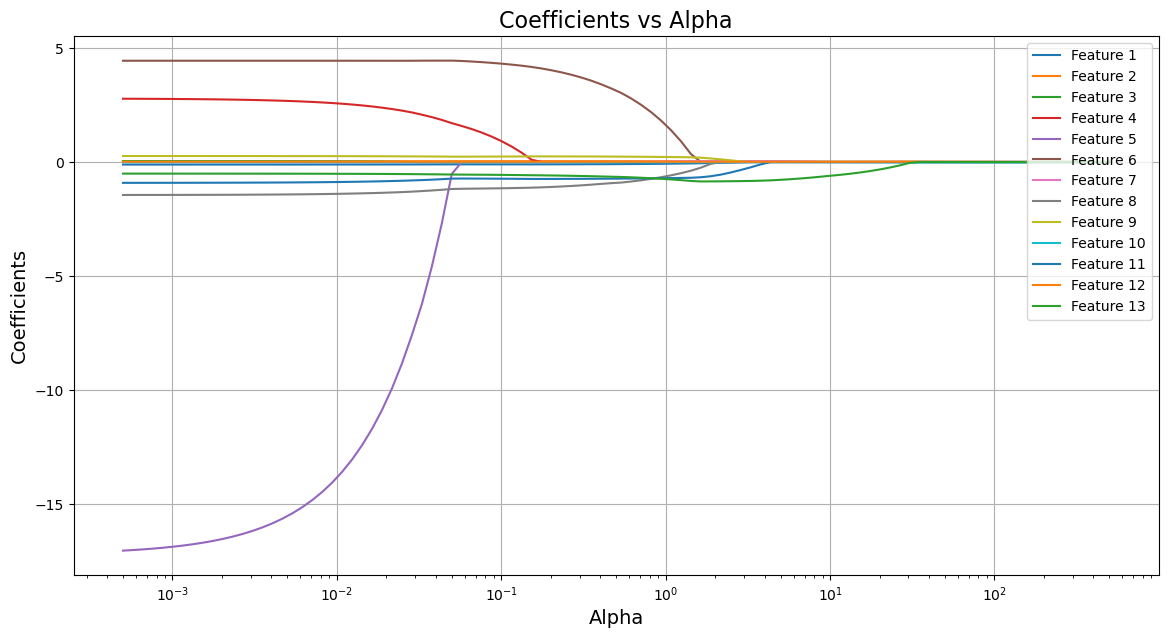

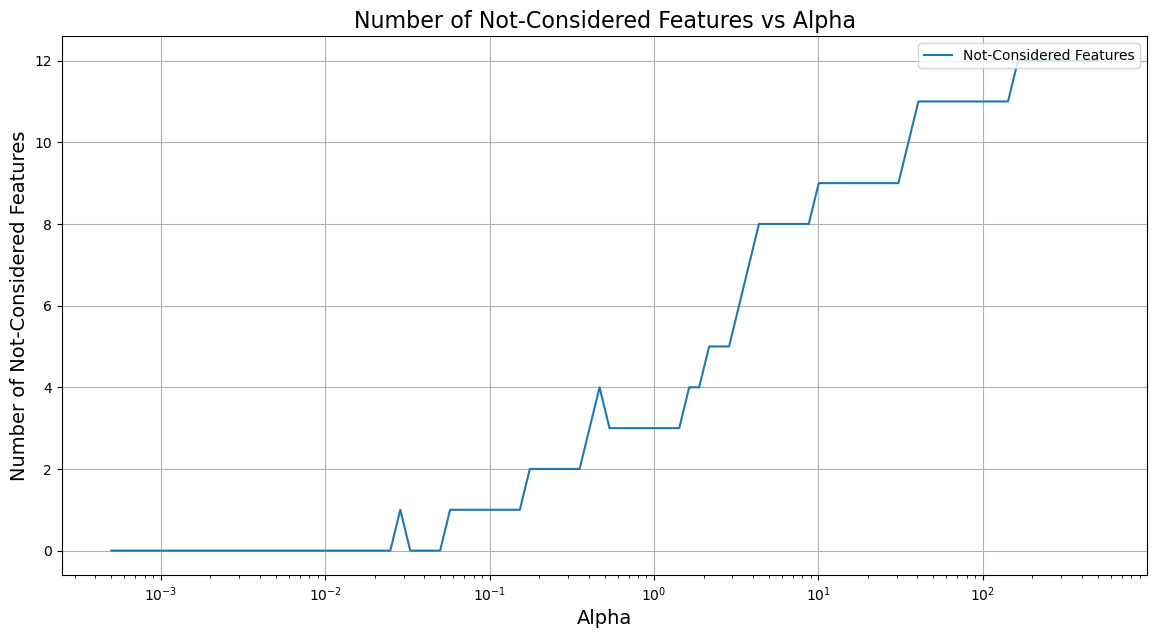

Optimum alpha:  0.7087370814634024
Train MSE:  24.68208868686117
Test MSE:  24.153219243073362
Train R^2:  0.715884406528832
Test R^2:  0.6706399397086963
Coefficients:  [-0.08616746  0.0308067  -0.          0.         -0.          2.50824373
  0.00611413 -0.801558    0.22931102 -0.01270717 -0.72057187  0.01186642
 -0.68953564]


In [7]:

# Initialize lists to store metrics and coefficients
train_errors = []
test_errors = []
coefficients = []
zero_features = []

# For each alpha
for alpha in alphas:
    # Create and train a Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    # Calculate MSE
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # Store coefficients and count zero coefficients (not considered features)
    coefficients.append(lasso.coef_)
    zero_features.append(np.sum(lasso.coef_ == 0))

# Convert coefficients to a numpy array for easier manipulation
coefficients = np.array(coefficients)

# Plot MSE for train and test versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('MSE vs Alpha for Train and Test Sets', fontsize=16)
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot coefficients versus alpha
plt.figure(figsize=(14, 7))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label = 'Feature ' + str(i+1))
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Coefficients', fontsize=14)
plt.title('Coefficients vs Alpha', fontsize=16)
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot number of not-considered features versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_features, label='Not-Considered Features')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Number of Not-Considered Features', fontsize=14)
plt.title('Number of Not-Considered Features vs Alpha', fontsize=16)
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Find the alpha that minimizes the test error
optimum_alpha = alphas[np.argmin(test_errors)]

print("Optimum alpha: ", optimum_alpha)

# Create and train a Lasso regression model with the optimum alpha
lasso_opt = Lasso(alpha=optimum_alpha)
lasso_opt.fit(X_train, y_train)

# Make predictions
y_train_pred_opt = lasso_opt.predict(X_train)
y_test_pred_opt = lasso_opt.predict(X_test)

# Calculate and print MSE for train and test sets
print("Train MSE: ", mean_squared_error(y_train, y_train_pred_opt))
print("Test MSE: ", mean_squared_error(y_test, y_test_pred_opt))

# Calculate and print R^2 for train and test sets
print("Train R^2: ", r2_score(y_train, y_train_pred_opt))
print("Test R^2: ", r2_score(y_test, y_test_pred_opt))

# Print coefficients
print("Coefficients: ", lasso_opt.coef_)

<div style="color:pink;">

# Ridge and Lasso Regression

Ridge and Lasso regression are both techniques to regularize linear regression models, but they do so in slightly different ways:

### Ridge Regression

This technique adds a penalty equal to the square of the magnitude of coefficients (L2 penalty). This results in smaller coefficients, but it does not force them to become zero. Therefore, the final model will still include all the features, but the influence of each feature will be reduced. This method is useful when all the features are relevant or when you have fewer features.

### Lasso Regression

This technique adds a penalty equal to the absolute value of the magnitude of coefficients (L1 penalty). This can result in coefficients becoming zero, effectively excluding the corresponding feature from the model. This property makes Lasso regression a useful tool for feature selection when you have a large number of features.


In summary, if feature selection is important for your model, Lasso regression may be the better choice. If all features are relevant or you have fewer features, Ridge regression may work better.

</div>

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

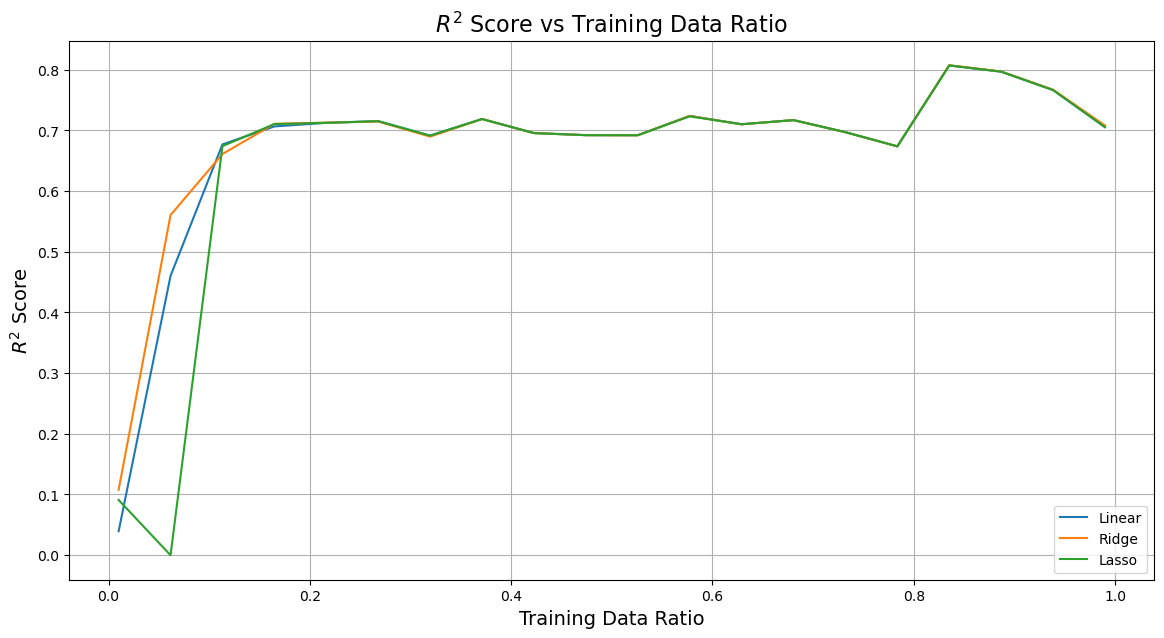

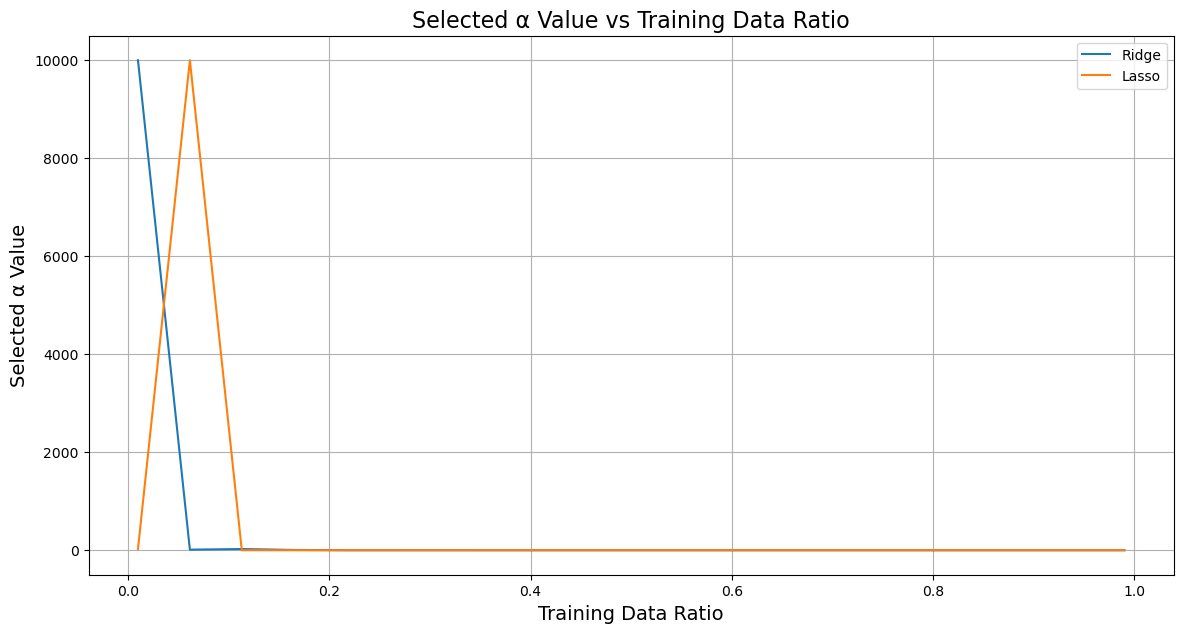

In [9]:
# Define the range of ratios
ratios = np.linspace(0.01, 0.99, 20)

# Initialize lists to store results
r2_scores = {'Linear': [], 'Ridge': [], 'Lasso': []}
alphas = {'Ridge': [], 'Lasso': []}

# Define a range of alpha values to try
alpha_range = np.logspace(-4, 4, 50)

# For each ratio
for ratio in ratios:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)
    
    # Fit the models
    linear = LinearRegression().fit(X_train, y_train)
    ridge = RidgeCV(alphas=alpha_range).fit(X_train, y_train)
    lasso = LassoCV(alphas=alpha_range).fit(X_train, y_train)
    
    # Calculate R^2 scores
    r2_scores['Linear'].append(r2_score(y_test, linear.predict(X_test)))
    r2_scores['Ridge'].append(r2_score(y_test, ridge.predict(X_test)))
    r2_scores['Lasso'].append(r2_score(y_test, lasso.predict(X_test)))
    
    # Record the selected α values
    alphas['Ridge'].append(ridge.alpha_)
    alphas['Lasso'].append(lasso.alpha_)

# Plot R^2 scores
plt.figure(figsize=(14, 7))
for model, scores in r2_scores.items():
    plt.plot(ratios, scores, label=model)
plt.xlabel('Training Data Ratio', fontsize=14)
plt.ylabel('$R^2$ Score', fontsize=14)
plt.title('$R^2$ Score vs Training Data Ratio', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot α values
plt.figure(figsize=(14, 7))
for model, alpha_values in alphas.items():
    plt.plot(ratios, alpha_values, label=model)
plt.xlabel('Training Data Ratio', fontsize=14)
plt.ylabel('Selected α Value', fontsize=14)
plt.title('Selected α Value vs Training Data Ratio', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()